In [1]:
import pandas as pd
import numpy as np
import re
import time

import bs4 as bs4
import json

import glob
import tqdm

pd.set_option("max.columns", 131)

#https://strftime.org/
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h5>The new "y" column created is our target variable. y = 1 means i enjoyed the video and y = 0 is the exact opposite.</h5>
<p>How did we create the "y" variable, you might ask. I just choose the videos i would enjoy manually and i marked the options accordingly.</p>
<p>Again, this database was not collected by my crawling code. That's because i need to improve my crawling methods after Youtube broke my previous code, again. So i will just stick with the database provided by the course i'm studying.</p>

In [2]:
df = pd.read_csv("raw_data_with_labels.csv", index_col=0)
df = df[df['y'].notnull()]
df.shape

(498, 16)

In [3]:
df.head()

,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
0,How to Become A Machine Learning Engineer | Ho...,0.0,28.028 visualizações,Publicado em 3 de set. de 2018,Educação,#MachineLearningAlgorithms #Datasciencecourse ...,Simplilearn\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarre...,28.028 visualizações\n\n\n\n\n\n\n\n601\n\nGos...,https://i.ytimg.com/vi/-5hEYRt8JE0/maxresdefau...,1280.0,720.0,"This video on ""How to become a Machine Learnin...",1280.0,720.0,simplilearn,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
1,BLOOPERS - Behind The Scenes. | DATA SCIENCE x...,0.0,1.131 visualizações,Publicado em 16 de nov. de 2018,Pessoas e blogs,#FAIL #insidezalando\n\n\n\n BLOOPERS - Beh...,Inside Zalando\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarr...,1.131 visualizações\n\n\n\n\n\n\n\n20\n\nGosto...,https://i.ytimg.com/vi/-7GiiT0yEyk/maxresdefau...,1280.0,720.0,#FAIL :) Have fun - and join our teams: https:...,1280.0,720.0,employer branding,/channel/UCTPin8TK-KRSI9zo9FoxG0g
2,Michael I. Jordan: Machine Learning: Dynamical...,1.0,1.816 visualizações,Publicado em 2 de mai. de 2019,Licença de atribuição Creative Commons (reutil...,#purdue #michaelijordan #engineering\n\n\n\n ...,Purdue Engineering\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,1.816 visualizações\n\n\n\n\n\n\n\n42\n\nGosto...,https://i.ytimg.com/vi/-8yYFdV5SOc/maxresdefau...,1280.0,720.0,2019 Purdue Engineering Distinguished Lecture ...,1280.0,720.0,electrical engineer,/channel/UC8FZ6dzFVkCACLH9YoMNFog
3,Best Deep Learning Tools - Welcome.AI,0.0,1.171 visualizações,Publicado em 13 de ago. de 2019,Ciência e tecnologia,Best Deep Learning Tools - Welcome.AI,Welcome.AI\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregan...,1.171 visualizações\n\n\n\n\n\n\n\n14\n\nGosto...,https://i.ytimg.com/vi/-9LLrwW1Vdo/maxresdefau...,1280.0,720.0,A collection of the 5 best deep learning tools...,1280.0,720.0,Watson,/channel/UC_215Y7rOAsqnFkO_hnpdIg
4,Kaggle Live-Coding: RNNs for Sarcasm Detection...,1.0,1.228 visualizações,Transmitido ao vivo em 30 de nov. de 2018,Ciência e tecnologia,Kaggle Live-Coding: RNNs for Sarcasm Detection...,Kaggle\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando.....,1.228 visualizações\n\n\n\n\n\n\n\n28\n\nGosto...,https://i.ytimg.com/vi/-9U84J178OQ/maxresdefau...,1280.0,720.0,Join Kaggle data scientist Rachael live as she...,1280.0,720.0,CS,/channel/UCSNeZleDn9c74yQc-EKnVTA


In [4]:
df.tail()

,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
496,Machine Learning With Python | Machine Learnin...,0.0,170.932 visualizações,Publicado em 1 de mar. de 2018,Educação,Machine Learning With Python | Machine Learnin...,Simplilearn\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarre...,170.932 visualizações\n\n\n\n\n\n\n\n2.393\n\n...,https://i.ytimg.com/vi/Q59X518JZHE/maxresdefau...,1280.0,720.0,This Machine Learning with Python tutorial giv...,1280.0,720.0,simplilearn machine learning,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
497,MACHINE LEARNING and AUGMENTED REALITY,0.0,69.644 visualizações,Publicado em 31 de mai. de 2018,Ciência e tecnologia,MACHINE LEARNING and AUGMENTED REALITY,MatthewHallberg\n\n\n\n\n\n\n\n\n\n\n\n\n\nCar...,69.644 visualizações\n\n\n\n\n\n\n\n1.569\n\nG...,https://i.ytimg.com/vi/Q6ERFwQNkzo/maxresdefau...,1280.0,720.0,This tutorial is going to go through getting T...,1280.0,720.0,image classification tensorflow tutorial,/channel/UClm2DY6pj3ygKoKhEVr7KFw
498,Kaggle 대회 시작하기 #1,0.0,470 visualizações,Publicado em 10 de nov. de 2019,Pessoas e blogs,Palos Verdes\n\n\n\n Kaggle 대회 시작하기 #1,LA오빠\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando...\...,470 visualizações\n\n\n\n\n\n\n\n39\n\nGostou ...,https://i.ytimg.com/vi/Q71MI-MkGhg/maxresdefau...,1280.0,720.0,LA오남매아빠 #LA오빠 - #즐거운DataScience 오늘은 현재 진행 중인 A...,1280.0,720.0,Ashrae Energy Prediction,/channel/UCjhlZKSIRVvQxlUprmv0bdg
499,The Netacea Approach | Smarter Bot Management ...,1.0,99.855 visualizações,Publicado em 25 de abr. de 2019,Ciência e tecnologia,The Netacea Approach | Smarter Bot Management ...,Netacea\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando....,99.855 visualizações\n\n\n\n\n\n\n\n14\n\nGost...,https://i.ytimg.com/vi/QDh1vq9tVsY/hqdefault.jpg,480.0,360.0,The majority of internet traffic is now made u...,1280.0,720.0,Cyber threats,/channel/UCMLXUedkowSUnn5rSXKUzCQ
500,Stanford CS224N: NLP with Deep Learning | Wint...,0.0,17.363 visualizações,Publicado em 21 de mar. de 2019,Educação,Stanford CS224N: NLP with Deep Learning | Wint...,stanfordonline\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarr...,17.363 visualizações\n\n\n\n\n\n\n\n191\n\nGos...,https://i.ytimg.com/vi/QEw0qEa0E50/maxresdefau...,1280.0,720.0,Professor Christopher Manning & PhD Candidate ...,1280.0,720.0,NaN,/channel/UCBa5G_ESCn8Yd4vw5U-gIcg


<h1>Data Cleaning</h1>
<p>Our database collected is usually dirty. Many null fields, wrong datatypes and so on. We need to fix it with some techniques.</p>
<p>After the cleaning, we will put the changes into a new dataframe called <b>"df_limpo"</b>.</p>

In [5]:
df_limpo = pd.DataFrame(index=df.index)

<h5>Converting the column 'watch-time-text' to Datetype</h5>
<p>First of all, the field 'watch-time-text' is a string in portuguese. We want just the date with type datetime.
In order to do that, we extracted the data out of the text with a regular expression and turn it into 3 columns:
day, month, year. As seen down below.</p>

In [6]:
clean_date = df['watch-time-text'].str.extract(r"(\d+) de ([a-z]+)\. de (\d+)")


In [7]:
clean_date

,0,1,2
0,3,set,2018
1,16,nov,2018
2,2,mai,2019
3,13,ago,2019
4,30,nov,2018
...,...,...,...
496,1,mar,2018
497,31,mai,2018
498,10,nov,2019
499,25,abr,2019


<h5>Cleaning the column of months</h5>
<p>The days before the tenth day of the month are built with only 1 character. In order to format the data into a more 
friendlly usage, we need to add the '0' character in front of those days. Meaning that the day 1, 2, 3 until 9 will
turn into day 01, 02, 03 until 09. I am doing this in this cell.</p>
<p>
We take every first column (clean_date[0]), whose quantity  of characters ( lenght ) of the value is equals to 1 
and turn it into a value with lenght equals to 2 characters, adding the number zero before each number below 10.</p>

In [8]:
clean_date[0] = clean_date[0].map(lambda x: "0"+x[0] if len(x) == 1 else x)


In [9]:
'''
It worked.
'''
clean_date[0]

0      03
1      16
2      02
3      13
4      30
       ..
496    01
497    31
498    10
499    25
500    21
Name: 0, Length: 498, dtype: object

<h5>Cleaning the column of months</h5>
<p>Now we need the month columns writen in English. Right now, it is writen in Portuguese. To do that, we just creating a dictionary replacing the value in Portuguese by the value in English. Then we apply those replacements to all the values in the  column, using the map function</p>

In [10]:
mapa_meses = {"jan": "Jan",
              "fev": "Feb",
              "mar": "Mar", 
              "abr": "Apr", 
              "mai": "May", 
              "jun": "Jun",
              "jul": "Jul",
              "ago": "Aug", 
              "set": "Sep", 
              "out": "Oct", 
              "nov": "Nov",
              "dez": "Dec"}

clean_date[1] = clean_date[1].map(mapa_meses)

In [11]:
clean_date[1]

0      Sep
1      Nov
2      May
3      Aug
4      Nov
      ... 
496    Mar
497    May
498    Nov
499    Apr
500    Mar
Name: 1, Length: 498, dtype: object

In [12]:
clean_date

,0,1,2
0,03,Sep,2018
1,16,Nov,2018
2,02,May,2019
3,13,Aug,2019
4,30,Nov,2018
...,...,...,...
496,01,Mar,2018
497,31,May,2018
498,10,Nov,2019
499,25,Apr,2019


<h5>Now we need a datetype</h5>
<p>We have the cleaned data into 3 columns. But we want just a single datetype column. To do that, we are going to join all the columns into just one single column separated by space. Then we are going to create a column called "date" and turn this string into a datetime type, passing the format we want as a parameter. </p>

In [13]:
clean_date = clean_date.apply(lambda x: " ".join(x), axis=1)

df_limpo['date'] = pd.to_datetime(clean_date, format="%d %b %Y")

<h5>Cleaning the counting of views</h5>
<p>We will get only the number through the power of regular expression. Then we want to replace the dots between the numbers by an empty value. That's because we use the numbers this way in English. The fillna function exists because some viewcount has no number writen. Only a message (string). This means that when we find those undesirable strings (we want only integer numbers here), we will have the output "nan". So, we are just gonna fill those nan values with the number zero. Finally, we turn the result into a integer as desired.  </p>

In [14]:
views = df['watch-view-count'].str.extract(r"(\d+\.?\d*)", expand=False).str.replace(".", "").fillna(0).astype(int)


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_32920/2268995852.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  views = df['watch-view-count'].str.extract(r"(\d+\.?\d*)", expand=False).str.replace(".", "").fillna(0).astype(int)


<p>Now we just need to create a column called "views" where we pass the number os views.</p>

In [15]:
df_limpo['views'] = views

<h1>Creating Features</h1>
<p>Now we are gonna create and tweak with some necessary features. And then, we are going to run tome tests.</p>
<p>All those changes will be attributed to a new dataframe value called "features"</p>

In [16]:
features = pd.DataFrame(index=df_limpo.index)
y = df['y'].copy()

<h5>Number of days since the publication of the video</h5>
<p>Here we want to get the number of days since the video publication. We select some date as a parameter (a day after the video publication) and we count the number of days from there. Down below, we are using the beggining of this year (2021) as a parameter. <p/>

In [17]:
pd.to_datetime("2021-01-01") - df_limpo["date"]

0      851 days
1      777 days
2      610 days
3      507 days
4      763 days
         ...   
496   1037 days
497    946 days
498    418 days
499    617 days
500    652 days
Name: date, Length: 498, dtype: timedelta64[ns]


<p>We only want the <b>number</b> of days as a float value. Without the string "days". So we divide this subtraction of days by a deltatime of value 1 where the parameter "D" means the days unit. Then we apply this operation to a new column called "time_since_pub"</p>

In [18]:
features['time_since_pub'] = (pd.to_datetime("2021-01-01") - df_limpo['date']) / np.timedelta64(1, 'D')




In [19]:
features['time_since_pub'].head()

0    851.0
1    777.0
2    610.0
3    507.0
4    763.0
Name: time_since_pub, dtype: float64

<p>Here there are no changes in the columns views. So we are just gonna attribut the column "view" from the dataframe "df_limpo" to another column "view" in the new dataframe called "features".</p>

In [20]:
features['views'] = df_limpo['views']

<h5>Number of views per day</h5>
<p>Now we want the number of views per day in each video, since the video publication. To do that we only need to execute a simple division: the number of views divided by the number of days since the video publication. Later we are gonna put the result of this operation in a new column called "views_per_day". </p>

In [21]:
features['views_per_day'] = features['views'] / features['time_since_pub']

In [22]:
features = features.drop(['time_since_pub'], axis=1)

<h1>Testing a few columns</h1>
<p>We are gonna try to create a model with only 2 columns. We wanna see how this will work out.</p>

In [23]:
features.head()

,views,views_per_day
0,28028,32.935370
1,1131,1.455598
2,1816,2.977049
3,1171,2.309665
4,1228,1.609436


<h5>Splitting and validating data</h5>
<p>Now it's time to split the data between train and test and make some validations. In order to do that, we are going to import some required libraries.</p>

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

<h5>Train and test split</h5>
<p>We need to split the data first. We are gonna make the split by the variable "date". Every data before the date "2019-04-01" is for training and everythin above or equal "2019-04-01" is for validation.</p>

In [25]:
#The features
Xtrain, Xval = features[df_limpo['date'] < "2019-04-01"], features[df_limpo['date'] >= "2019-04-01"]

#The target
ytrain, yval = y[df_limpo['date'] < "2019-04-01"], y[df_limpo['date'] >= "2019-04-01"]



In [26]:

Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((228, 2), (270, 2), (228,), (270,))

<h5>Testing a decision tree model</h5>
<p>When we need/want to try too few features and the best way to test that is with a decision tree model. That's is what we are gonna do down below.</p>
<p>We are using a decision tree model with a max depth of 2 and a class_weight = balanced. That's because,  as seen below, we have a very unbalanced data</p>

In [27]:
#We have only 14% of positive examples, making this database a very unbalanced one. We can change that in the decision tree 
#parameter called "class_weight"
ytrain.mean()

0.14035087719298245

<p>We have only 14% of positive examples, making this database a very unbalanced one. We can change that in the decision tree 
parameter called "class_weight". This way, we will have different weight for different values to compensate this lack of balance.</p>

In [28]:
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight="balanced")
mdl.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

<h1>Validating with metrics</h1>
<p>The function called "predict_proba" gives a numpy array with 2 columns: 1 columns tell us the probability of 0 and another column tell us the probability of 1 as values, for each line from the database.</p>

In [29]:
p = mdl.predict_proba(Xval)[:, 1]

In [30]:
p

array([0.64304462, 0.64304462, 0.25388601, 0.34751773, 0.64304462,
       0.64304462, 0.25388601, 0.        , 0.34751773, 0.64304462,
       0.64304462, 0.64304462, 0.25388601, 0.25388601, 0.25388601,
       0.64304462, 0.25388601, 0.64304462, 0.25388601, 0.64304462,
       0.        , 0.64304462, 0.64304462, 0.25388601, 0.34751773,
       0.25388601, 0.25388601, 0.64304462, 0.        , 0.64304462,
       0.64304462, 0.64304462, 0.64304462, 0.64304462, 0.64304462,
       0.64304462, 0.25388601, 0.25388601, 0.64304462, 0.        ,
       0.64304462, 0.64304462, 0.64304462, 0.64304462, 0.25388601,
       0.64304462, 0.25388601, 0.34751773, 0.64304462, 0.25388601,
       0.25388601, 0.34751773, 0.34751773, 0.64304462, 0.64304462,
       0.64304462, 0.34751773, 0.64304462, 0.64304462, 0.25388601,
       0.25388601, 0.25388601, 0.25388601, 0.25388601, 0.25388601,
       0.64304462, 0.34751773, 0.25388601, 0.25388601, 0.25388601,
       0.25388601, 0.64304462, 0.25388601, 0.25388601, 0.64304

<h5>Machine Learning metrics</h5>
<p>The objective of this task is to rank the better videos. The ones i might wanna see. To do that, we will use some Machine Learning metrics to validate the answers (positive or negative) our model gave us.</p> 


In [31]:
from sklearn.metrics import roc_auc_score, average_precision_score

    
<p>First, the "average_precision_score" function will help me to answer: from all positive answers that my model gave to us, what's the average of correct answers.</p>
<p>Right down below, of all answers that my model answered as positive, only 17% was really positive. That's our baseline. We want precisions higher than that in the next models.</p>

In [32]:
average_precision_score(yval, p)

0.17022043550822075

<p>The "roc_auc_score" function tells how much the model is capable of distinguishing between classes. In our case, 0 or 1. So the higher this number, the better. An AUC = 0,5 means that our model can not distinguish between positive classes and negative classes.</p>
<p>The result down below means that our model has a capacity of 62% of distinguish between 0 and 1. This can get better.</p>

In [33]:
roc_auc_score(yval, p)

0.620790273556231

<h5>Ploting the Decision Tree steps </h5>

[Text(279.0, 453.0, 'views_per_day <= 16.864\ngini = 0.5\nsamples = 228\nvalue = [114.0, 114.0]'),
 Text(139.5, 271.8, 'views <= 397.5\ngini = 0.477\nsamples = 129\nvalue = [59.908, 92.625]'),
 Text(69.75, 90.59999999999997, 'gini = 0.379\nsamples = 19\nvalue = [10.469, 3.562]'),
 Text(209.25, 90.59999999999997, 'gini = 0.459\nsamples = 110\nvalue = [49.439, 89.062]'),
 Text(418.5, 271.8, 'views <= 26712.0\ngini = 0.406\nsamples = 99\nvalue = [54.092, 21.375]'),
 Text(348.75, 90.59999999999997, 'gini = 0.0\nsamples = 24\nvalue = [13.959, 0.0]'),
 Text(488.25, 90.59999999999997, 'gini = 0.453\nsamples = 75\nvalue = [40.133, 21.375]')]

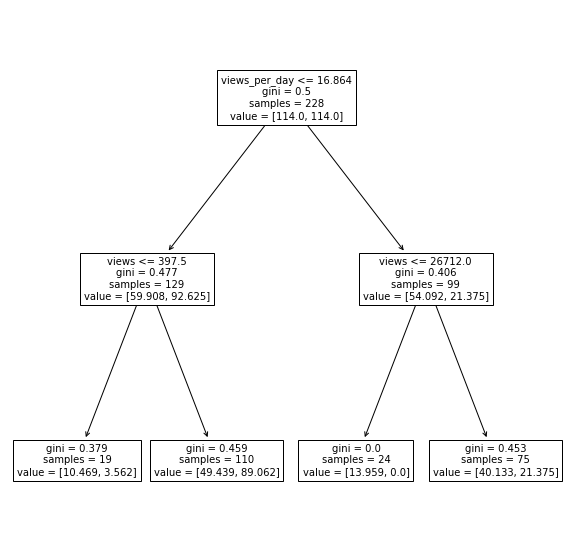

In [34]:
from sklearn.tree import plot_tree

fig, ax = pylab.subplots(1,1, figsize=(10,10))
plot_tree(mdl, ax=ax, feature_names=Xtrain.columns)